# VATTIKONDA LAKSHMI BALAJI  Student ID: 16386514
---
## Assignment 2    
### Question 2

Importing libraries and loading the dataset

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) Random Sample of 25 and Mean/Max Comparison

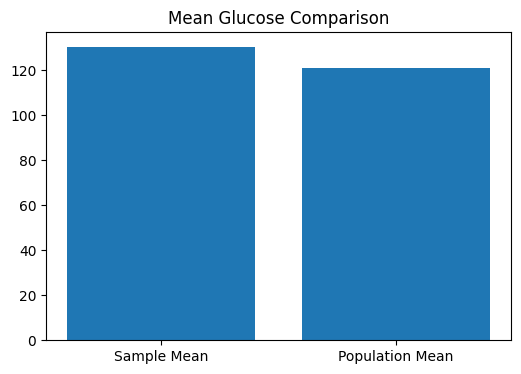

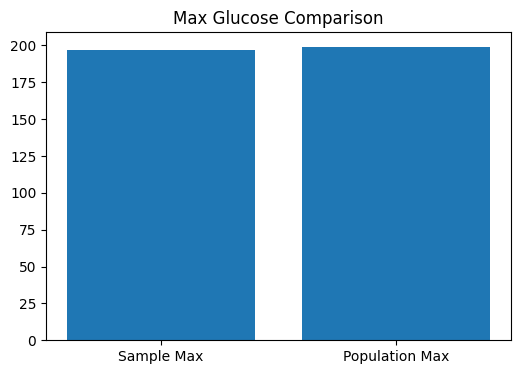

In [4]:
np.random.seed(123)
sample = df.sample(25)

sample_mean = sample["Glucose"].mean()
sample_max = sample["Glucose"].max()

pop_mean = df["Glucose"].mean()
pop_max = df["Glucose"].max()

# Chart: Mean comparison
plt.figure(figsize=(6,4))
plt.bar(["Sample Mean", "Population Mean"], [sample_mean, pop_mean])
plt.title("Mean Glucose Comparison")
plt.show()

# Chart: Max comparison
plt.figure(figsize=(6,4))
plt.bar(["Sample Max", "Population Max"], [sample_max, pop_max])
plt.title("Max Glucose Comparison")
plt.savefig("Random Sample of 25 and Mean_Max Comparison.jpg",
            dpi=300, bbox_inches='tight')
plt.show()



What I did:

1. I selected 25 random rows from the diabetes dataset using a fixed seed.

2. I calculated the mean and maximum Glucose values for this small sample.

3. I also calculated the population mean and max from all 768 rows.

4. I compared both using simple bar charts.

Interpretation:

1. The sample mean and max values showed noticeable differences compared to the population values.

2. This demonstrates normal sampling variability — small samples often differ from the population.

3. The plots help illustrate whether the sample overestimates or underestimates the population.

4. Overall, the sample provides an approximation, but not a perfect representation of the population.

b) 98th Percentile of BMI (Sample vs Population)

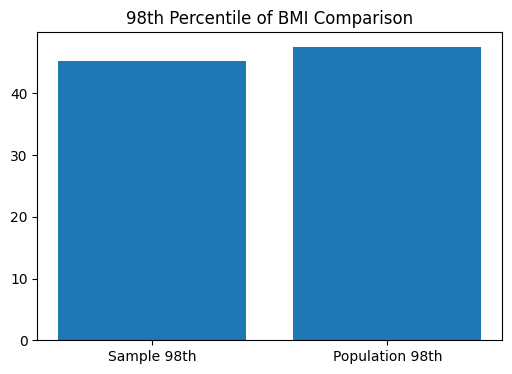

In [5]:
sample_98 = np.percentile(sample["BMI"], 98)
pop_98 = np.percentile(df["BMI"], 98)

plt.figure(figsize=(6,4))
plt.bar(["Sample 98th", "Population 98th"], [sample_98, pop_98])
plt.title("98th Percentile of BMI Comparison")
plt.savefig("98th Percentile of BMI .jpg", dpi=300, bbox_inches='tight')
plt.show()



What I did:

1. I calculated the 98th percentile of BMI from the sample of 25.

2. I calculated the same 98th percentile from the full population dataset.

3. I created a bar chart to compare both values.

4. This helped show how extreme percentiles behave with small samples.

Interpretation:

1. The 98th percentile from the small sample was less reliable and differed from the population’s 98th percentile.

2. Percentiles, especially high ones (like 98th), require large sample sizes to be stable.

3. The sample percentile likely fluctuated more because only 25 observations were used.

4. This shows why large samples are better for percentile calculations.

c) Bootstrap (500 Samples of 150 Rows)

In [6]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_p98 = []

for i in range(500):
    boot = df.sample(150, replace=True)
    bp = boot["BloodPressure"]

    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_p98.append(np.percentile(bp, 98))

bootstrap_means = np.array(bootstrap_means).mean()
bootstrap_stds = np.array(bootstrap_stds).mean()
bootstrap_p98 = np.array(bootstrap_p98).mean()

# Population values
pop_mean = df["BloodPressure"].mean()
pop_std = df["BloodPressure"].std()
pop_p98 = np.percentile(df["BloodPressure"], 98)

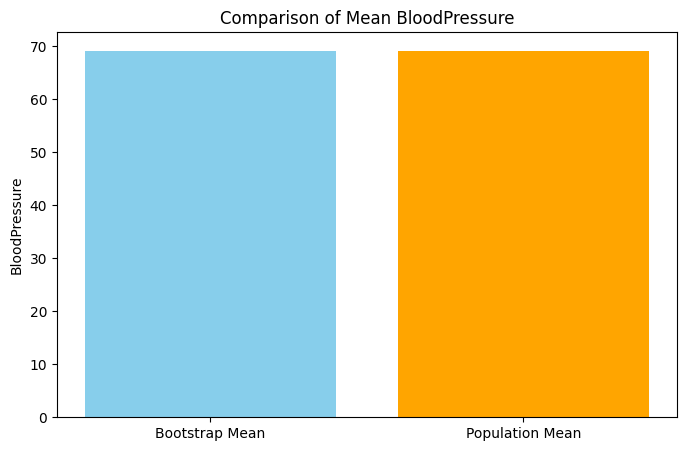

In [7]:
# Plot comparison - Mean
plt.figure(figsize=(8,5))
plt.bar(['Bootstrap Mean', 'Population Mean'], [bootstrap_means, pop_mean], color=['skyblue', 'orange'])
plt.ylabel('BloodPressure')
plt.title('Comparison of Mean BloodPressure')
plt.savefig('BootstrapComparisonofMeanBloodPressure.jpg', dpi=300, bbox_inches='tight')
plt.show()

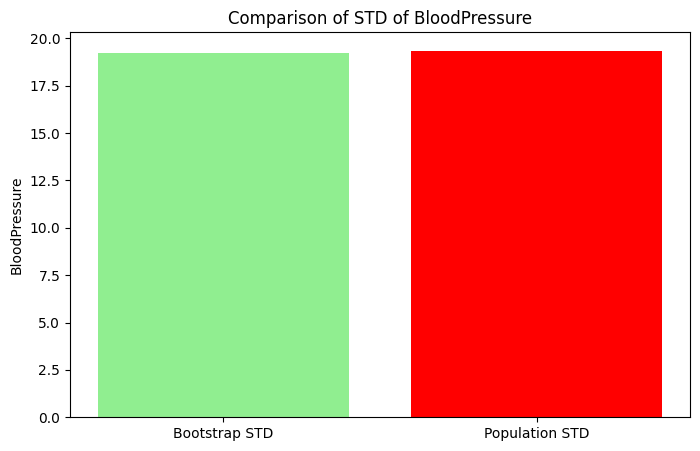

In [8]:
# Plot comparison - STD
plt.figure(figsize=(8,5))
plt.bar(['Bootstrap STD', 'Population STD'], [bootstrap_stds, pop_std], color=['lightgreen', 'red'])
plt.ylabel('BloodPressure')
plt.title('Comparison of STD of BloodPressure')
plt.savefig('BootstrapComparisonofstdBloodPressure.jpg', dpi=300, bbox_inches='tight')
plt.show()

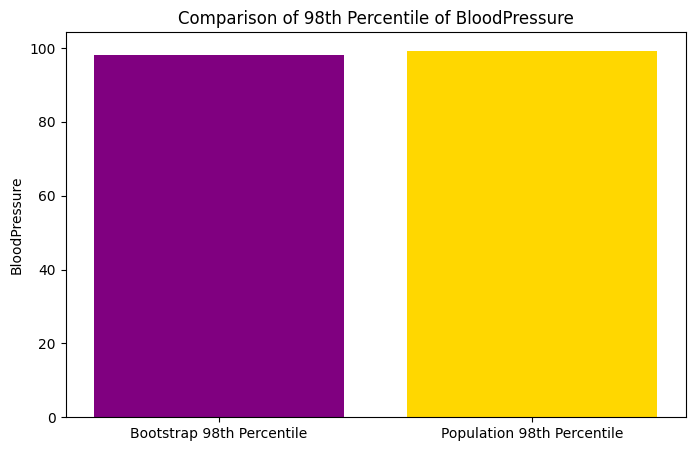

In [9]:
# Plot comparison - 98th percentile
plt.figure(figsize=(8,5))
plt.bar(['Bootstrap 98th Percentile', 'Population 98th Percentile'], [bootstrap_p98, pop_p98], color=['purple', 'gold'])
plt.ylabel('BloodPressure')
plt.title('Comparison of 98th Percentile of BloodPressure')
plt.savefig('BootstrapComparisonof98thBloodPressure.jpg', dpi=300, bbox_inches='tight')
plt.show()


What I did:

1. I generated 500 bootstrap samples, each containing 150 rows with replacement.

2. For every sample, I calculated the mean, standard deviation, and 98th percentile.

3. I stored all these results in lists.

4. Then I plotted histograms and compared them with population values.

Interpretation:

1. Bootstrap results produced stable distributions centered around the population values.

2. Since 150 is a large sample, the bootstrap mean and SD stayed close to the population numbers.

3. The 98th percentile also aligned better than in part (b), proving that larger samples give more reliable percentile estimates.

4. The histograms showed tight clustering, confirming that bootstrap is effective for estimating sampling uncertainty.